# **Exploratory Data Analysis**

## Data Exploration

In [1]:
import json

In [2]:
f = open('/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Data/products.json')
product_data = json.load(f)
product_data[0]

{'sku': 43900,
 'name': 'Duracell - AAA Batteries (4-Pack)',
 'type': 'HardGood',
 'price': 5.49,
 'upc': '041333424019',
 'category': [{'id': 'pcmcat312300050015',
   'name': 'Connected Home & Housewares'},
  {'id': 'pcmcat248700050021', 'name': 'Housewares'},
  {'id': 'pcmcat303600050001', 'name': 'Household Batteries'},
  {'id': 'abcat0208002', 'name': 'Alkaline Batteries'}],
 'shipping': 5.49,
 'description': 'Compatible with select electronic devices; AAA size; DURALOCK Power Preserve technology; 4-pack',
 'manufacturer': 'Duracell',
 'model': 'MN2400B4Z',
 'url': 'http://www.bestbuy.com/site/duracell-aaa-batteries-4-pack/43900.p?id=1051384074145&skuId=43900&cmp=RMXCC',
 'image': 'http://img.bbystatic.com/BestBuy_US/images/products/4390/43900_sa.jpg'}

In [3]:
f = open('/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Data/categories.json')
cat_data = json.load(f)
cat_data[0]

{'id': 'abcat0010000',
 'name': 'Gift Ideas',
 'path': [{'id': 'abcat0010000', 'name': 'Gift Ideas'}],
 'subCategories': [{'id': 'pcmcat140000050035',
   'name': 'Capturing Photos & Videos'},
  {'id': 'pcmcat140000050036', 'name': 'Listening to Digital Music'},
  {'id': 'pcmcat140000050037', 'name': 'Computing Made Easy'},
  {'id': 'pcmcat140000050039', 'name': 'Simple GPS Navigation'},
  {'id': 'pcmcat140000050040', 'name': 'Playing Video Games'},
  {'id': 'pcmcat140000050041', 'name': 'Watching HDTV'},
  {'id': 'pcmcat140000050042', 'name': 'Enjoying Favorite Movies'},
  {'id': 'abcat0012000', 'name': 'Him'},
  {'id': 'abcat0011000', 'name': 'Her'},
  {'id': 'abcat0013000', 'name': 'Teens'},
  {'id': 'abcat0014000', 'name': 'Kids'},
  {'id': 'pcmcat84000050001', 'name': 'Anniversaries'},
  {'id': 'pcmcat84000050004', 'name': 'Baby Showers'},
  {'id': 'pcmcat94300050028', 'name': 'Birthdays'},
  {'id': 'pcmcat84000050002', 'name': 'Business Gifts'},
  {'id': 'pcmcat84000050003', 'name

In [4]:
f = open('/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Data/stores.json')
stores_data = json.load(f)
stores_data[0]

{'id': 1000,
 'type': 'BigBox',
 'name': 'Mall of America',
 'address': '340 W Market',
 'address2': '',
 'city': 'Bloomington',
 'state': 'MN',
 'zip': '55425',
 'location': {'lat': 44.85466, 'lon': -93.24565},
 'hours': 'Mon: 10-9:30; Tue: 10-9:30; Wed: 10-9:30; Thurs: 10-9:30; Fri: 10-9:30; Sat: 10-9:30; Sun: 11-7',
 'services': ['Geek Squad Services',
  'Best Buy Mobile',
  'Best Buy For Business',
  'Apple Shop',
  'Hablamos Español',
  'Camera Experience Shop ',
  'Electronics Recycling',
  'Magnolia Home Theater',
  'Samsung Experience Shop',
  'Windows Store']}

## Data Analysis

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display
import warnings
import time
import math
import joblib
from scipy import sparse
%matplotlib inline

In [6]:
#Make the DataFrame for further analysis
column_names = ['name','description','categories']
df_products = pd.DataFrame(columns = column_names)

names,descriptions,categories = [],[],[]
for product in product_data:
  names.append(product['name'])
  descriptions.append(product['description'])

  productCategories = []
  for cat in product['category']:
    productCategories.append(cat['name'])
  categories.append(productCategories)

df_products = pd.DataFrame(list(zip(names,descriptions,categories)) ,columns = column_names)

In [7]:
IPython.display.HTML(pd.DataFrame(df_products.head()).to_html())

,name,description,categories
0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA size; DURALOCK Power Preserve technology; 4-pack,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]"
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"Long-lasting energy; DURALOCK Power Preserve technology; for toys, clocks, radios, games, remotes, PDAs and more","[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]"
2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA size; DURALOCK Power Preserve technology; 8-pack,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]"
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester included,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]"
4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C size; DURALOCK Power Preserve technology; 4-pack,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]"


In [8]:
df_products.describe()

,name,description,categories
count,51645,51646,51646
unique,48557,38537,1667
top,Lenmar - Lithium-Ion Battery - Black,Perfect gift card? Piece of cake. All Best Buy...,"[Video Games, Pre-Owned Games]"
freq,31,370,3556


In [9]:
print("BASIC INFO")
print('-'*20,"\n")
print("Percentage of missing values")
df_products = df_products.dropna().reset_index(drop=True)
empties = df_products.isna().sum()
empties_sort = empties.sort_values(ascending= False) 
empties_sort_per = (empties_sort/len(df_products))
print(empties_sort_per,"\n")

print("The shape of the dataset is:",df_products.shape,"\n")
columns = list(df_products.columns)
print("The columns of the dataset are:",columns,"\n")
for i in range(len(columns)):
  print(f"The type of {columns[i]} column is:", df_products[str(columns[i])].dtypes)

BASIC INFO
-------------------- 

Percentage of missing values
name           0.0
description    0.0
categories     0.0
dtype: float64 

The shape of the dataset is: (51645, 3) 

The columns of the dataset are: ['name', 'description', 'categories'] 

The type of name column is: object
The type of description column is: object
The type of categories column is: object


In [10]:
all_categories_lenght = pd.DataFrame(columns=["Amount of categories"])
for index, column in df_products.iterrows():
  all_categories_lenght.loc[index, "Amount of categories"] = len(column["categories"])

df_products = pd.concat([df_products, all_categories_lenght], axis=1)

4    20512
3    18845
2     5888
5     5300
1      754
6      345
7        1
Name: Amount of categories, dtype: int64 



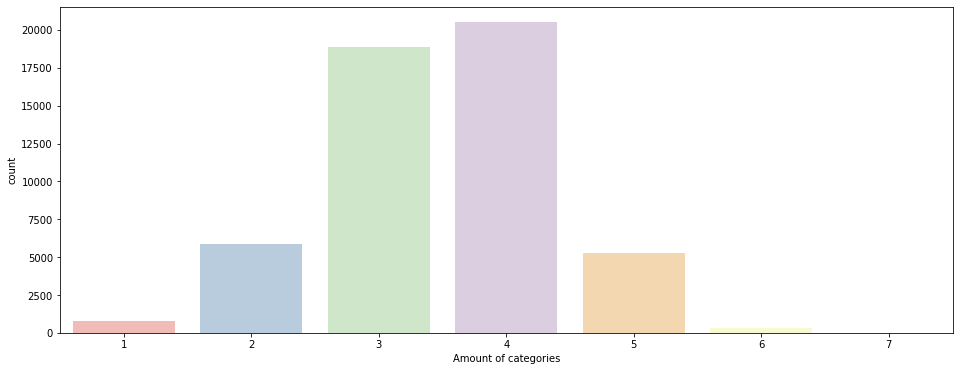

The percentage of the value 1 is of 1.46 % 

The percentage of the value 2 is of 11.4 % 

The percentage of the value 3 is of 36.49 % 

The percentage of the value 4 is of 39.72 % 

The percentage of the value 5 is of 10.26 % 

The percentage of the value 6 is of 0.67 % 

The percentage of the value 7 is of 0.0 % 



In [12]:
#Let´s see how many categories are the "hottest"
a = df_products["Amount of categories"].value_counts()
print(a,"\n")
plt.figure(figsize=(16,6))
sns.countplot(data=df_products, x="Amount of categories", palette='Pastel1')
plt.show()

total = df_products.shape[0]
for i in range(8):
  if i != 0:
    percentage = a[i]/total
    print(f"The percentage of the value {i} is of",round(percentage,4)*100,"%","\n")

As there is only one product with 7 categories, we are not going that deep into the "sub-branches" of that amount of categories, in order to not generate an extra column of aporx. 52000 rows for just one value.

In [13]:
df_products["Amount of categories"] = df_products["Amount of categories"].astype(int)
columns = ["Main Category", "1st Subcategory", "2nd Subcategory", "3rd Subcategory","4th Subcategory", "5th Subcategory"]
categories_columns = pd.DataFrame(columns=columns)

for index, columns in df_products.iterrows():
  cat_amount = df_products.loc[index, "Amount of categories"]
  if cat_amount > 6:
      cat_amount = 6
  for i in range(cat_amount):
    if i == 0:
      categories_columns.loc[index, "Main Category"] = df_products.loc[index, "categories"][0]
    elif i == 1:
      categories_columns.loc[index, "1st Subcategory"] = df_products.loc[index, "categories"][1] 
    elif i == 2:
      categories_columns.loc[index, "2nd Subcategory"] = df_products.loc[index, "categories"][2]   
    elif i == 3:
      categories_columns.loc[index, "3rd Subcategory"] = df_products.loc[index, "categories"][3]   
    elif i == 4:
      categories_columns.loc[index, "4th Subcategory"] = df_products.loc[index, "categories"][4]     
    elif i == 5:
      categories_columns.loc[index, "5th Subcategory"] = df_products.loc[index, "categories"][5]     

df_products = pd.concat([df_products, categories_columns], axis=1)


In [15]:
IPython.display.HTML(pd.DataFrame(df_products.head(10)).to_html())

,name,description,categories,Amount of categories,Main Category,1st Subcategory,2nd Subcategory,3rd Subcategory,4th Subcategory,5th Subcategory
0,Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA size; DURALOCK Power Preserve technology; 4-pack,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN
1,Duracell - AA 1.5V CopperTop Batteries (4-Pack),"Long-lasting energy; DURALOCK Power Preserve technology; for toys, clocks, radios, games, remotes, PDAs and more","[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN
2,Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA size; DURALOCK Power Preserve technology; 8-pack,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN
3,Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester included,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN
4,Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C size; DURALOCK Power Preserve technology; 4-pack,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN
5,Duracell - D Batteries (4-Pack),Compatible with select electronic devices; D size; DURALOCK Power Preserve technology; 4-pack,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN
6,Duracell - 9V Batteries (2-Pack),Compatible with select electronic devices; alkaline chemistry; 9V size; DURALOCK Power Preserve technology; 2-pack,"[Connected Home & Housewares, Housewares, Household Batteries, Alkaline Batteries]",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN
7,Directed Electronics - Viper Audio Glass Break Sensor,From our expanded online assortment; compatible with Directed Electronics alarm systems; microphone and microprocessor detect and analyze intrusions; detects quiet glass breaks,[Carfi Instore Only],1,Carfi Instore Only,NaN,NaN,NaN,NaN,NaN
8,Energizer - N Cell E90 Batteries (2-Pack),Alkaline batteries; 1.5V,"[Connected Home & Housewares, Housewares, Household Batteries, Specialty Batteries]",4,Connected Home & Housewares,Housewares,Household Batteries,Specialty Batteries,NaN,NaN
9,"Metra - Radio Installation Dash Kit for Most 1989-2000 Ford, Lincoln & Mercury Vehicles - Black","From our expanded online assortment; compatible with most 1989-2000 Ford, Lincoln and Mercury vehicles; snap-in TurboKit offers fast installation; spacer/trim ring; rear support bracket","[Car Electronics & GPS, Car Installation Parts & Accessories, Car Audio Installation Parts, Deck Installation Parts, Dash Installation Kits]",5,Car Electronics & GPS,Car Installation Parts & Accessories,Car Audio Installation Parts,Deck Installation Parts,Dash Installation Kits,NaN


Duplicates Elimination

In [16]:
#1- Eliminate real duplicates to avoid overfitting
df_products.drop_duplicates(subset=["name","description","Main Category", "1st Subcategory", "2nd Subcategory", "3rd Subcategory", "4th Subcategory", "5th Subcategory"], keep="first", inplace=True)

#2- Eliminate the product duplicate in "name" which has the less amount amount of subctegories.
df_products[df_products["name"].duplicated()].sort_values(by=['Amount of categories'],ascending=False)
df_products = df_products[~df_products["name"].duplicated()].sort_values(by=['Amount of categories'],ascending=False)
df_products = df_products.sort_index()

In [17]:
df_products.to_csv("dataframe_preothers.csv", index=False)

We have to be aware of the problem of having unique products for the next part of the project at the time of splitting our dataset into train and test. We would be leaving labels with just the unique class of 0, and we will not be able to train the model. One form of preventing this is to check that I have at least 2 samples of each label, for each subcategory and then stratifying at the time of splitting my dataset... In this particular case I made a deeper elimination, in correlation with the amount labels for each subcategory, in order to eliminate those products which are very few times.

In [18]:
counts = df_products["5th Subcategory"].value_counts()
df_products = df_products[~df_products["5th Subcategory"].isin(counts[counts <= 2].index)]
print(df_products["5th Subcategory"].value_counts().tail(), "\n")

counts = df_products["4th Subcategory"].value_counts()
df_products = df_products[~df_products["4th Subcategory"].isin(counts[counts <= 5].index)]
print(df_products["4th Subcategory"].value_counts().tail(), "\n")

counts = df_products["3rd Subcategory"].value_counts()
df_products = df_products[~df_products["3rd Subcategory"].isin(counts[counts <= 15].index)]
print(df_products["3rd Subcategory"].value_counts().tail(), "\n")

counts = df_products["2nd Subcategory"].value_counts()
df_products = df_products[~df_products["2nd Subcategory"].isin(counts[counts <= 10].index)]
print(df_products["2nd Subcategory"].value_counts().tail(), "\n")

counts = df_products["1st Subcategory"].value_counts()
df_products = df_products[~df_products["1st Subcategory"].isin(counts[counts <= 10].index)]
print(df_products["1st Subcategory"].value_counts().tail(), "\n")

counts = df_products["Main Category"].value_counts()
df_products = df_products[~df_products["Main Category"].isin(counts[counts <= 2].index)]
print(df_products["Main Category"].value_counts().tail(), "\n")

Outdoor Cushions & Pillows    8
Color Inkjet Printers         5
Soft Cases                    5
Outdoor Bistro Sets           5
Outdoor Storage Cabinets      4
Name: 5th Subcategory, dtype: int64 

Maintenance Software      6
Large                     6
Coffee Beans              6
Distortion & Overdrive    6
Patio Chairs & Tables     6
Name: 4th Subcategory, dtype: int64 

Snow Cone Machines        17
CD Players & Recorders    16
Outdoor GPS               16
Softboxes                 16
Can Openers               16
Name: 3rd Subcategory, dtype: int64 

Evaporative Coolers       12
Washer Accessories        12
Radios                    11
3D Glasses                11
Camcorder Bags & Cases    11
Name: 2nd Subcategory, dtype: int64 

Smart Sports Equipment        15
Movies & TV Shows             15
App-Enabled Toys              14
Movie & Music Cards           12
Pre-Owned & Trade-In Games    11
Name: 1st Subcategory, dtype: int64 

XBox_Buy2Get1_20130616     4
Furniture                 

In [19]:
df_products.shape

(45232, 10)

In [20]:
def get_description(column):
  print(column.upper())
  print('-'*20)
  print(df_products[str(column)].describe(),"\n")

get_description("Main Category")
get_description("1st Subcategory")
get_description("2nd Subcategory")
get_description("3rd Subcategory")
get_description("4th Subcategory")
get_description("5th Subcategory")

MAIN CATEGORY
--------------------
count          45232
unique            33
top       Appliances
freq            7970
Name: Main Category, dtype: object 

1ST SUBCATEGORY
--------------------
count                      44568
unique                       121
top       Cell Phone Accessories
freq                        5691
Name: 1st Subcategory, dtype: object 

2ND SUBCATEGORY
--------------------
count                  38834
unique                   342
top       iPhone Accessories
freq                    1993
Name: 2nd Subcategory, dtype: object 

3RD SUBCATEGORY
--------------------
count                    21988
unique                     282
top       iPhone Cases & Clips
freq                      1845
Name: 3rd Subcategory, dtype: object 

4TH SUBCATEGORY
--------------------
count                       5102
unique                       117
top       Dash Installation Kits
freq                         681
Name: 4th Subcategory, dtype: object 

5TH SUBCATEGORY
--------------------

I should do at least a quick check of the labeled products, if the categories are respected as they were assigned (its hierarchy). I want to know, how many categories of the supossed Main categories are only in that column, and this same logic and with all the other columns.

In [21]:
def check_nans(setset):
  a = list(setset)
  try:
    newlist = [x for x in a if np.isnan(x) == False]
  except:
    pass
  try:
    newlist = [x for x in a if pd.isnull(x) == False]
  except:
    pass
  try:
    newlist = [x for x in a if math.isnan(x) == False]
  except:
    pass

  return newlist

In [22]:
#3- Eliminate the "error data" -> By error Data I mean the products which has mixed up its categories
main_category = df_products["Main Category"].tolist()
a = set(main_category)
subcategory1 = df_products["1st Subcategory"].tolist()
b = set(subcategory1)
subcategory2 = df_products["2nd Subcategory"].tolist()
c = set(subcategory2)
subcategory3 = df_products["3rd Subcategory"].tolist()
d = set(subcategory3)
subcategory4 = df_products["4th Subcategory"].tolist()
e = set(subcategory4)
subcategory5 = df_products["5th Subcategory"].tolist()
f = set(subcategory5)

#Main and the rest
g = a & b
g = check_nans(g)
print("The intersection between Main and 1st:",g, len(g))
h = a & c
h = check_nans(h)
print("The intersection between Main and 2nd:",h, len(h))
i = a & d
i = check_nans(i)
print("The intersection between Main and 3rd:",i, len(i))
j = a & e
j = check_nans(j)
print("The intersection between Main and 4th:",j, len(j))
k = a & f
k = check_nans(k)
print("The intersection between Main and 5th:",k, len(k))

#1st Sub and the rest
gg = b & c
gg = check_nans(gg)
print("The intersection between 1st and 2nd:",gg, len(gg))
hh = b & d
hh = check_nans(hh)
print("The intersection between 1st and 3rd:",hh, len(hh))
ii = b & e
ii = check_nans(ii)
print("The intersection between 1st and 4th:",ii, len(ii))
jj = b & f
jj = check_nans(jj)
print("The intersection between 1st and 5th:",jj, len(jj))

#2nd Sub and the rest
jjj = c & d
jjj = check_nans(jjj)
print("The intersection between 2nd and 3rd:",jjj, len(jjj))
hhh = c & e
hhh = check_nans(hhh)
print("The intersection between 2nd and 4th:",hhh, len(hhh))
iii = c & f
iii = check_nans(iii)
print("The intersection between 2nd and 5th:",iii, len(iii))

#3rd Sub and the rest
x = d & e
x = check_nans(x)
print("The intersection between 3rd and 4th:",x, len(x))
y = d & f
y = check_nans(y)
print("The intersection between 3rd and 5th:",y, len(y))

#4th Sub and the rest
z = e & f
z = check_nans(z)
print("The intersection between 4th and 5th",z, len(z))

The intersection between Main and 1st: [] 0
The intersection between Main and 2nd: ['Voice Recognition Software'] 1
The intersection between Main and 3rd: [] 0
The intersection between Main and 4th: [] 0
The intersection between Main and 5th: [] 0
The intersection between 1st and 2nd: ['TV & Home Theater Accessories', 'Keyboards', 'Apple Watch'] 3
The intersection between 1st and 3rd: ['Bluetooth & Wireless Speakers'] 1
The intersection between 1st and 4th: [] 0
The intersection between 1st and 5th: [] 0
The intersection between 2nd and 3rd: ['Radios', 'Microphones'] 2
The intersection between 2nd and 4th: ['Cables & Connectors'] 1
The intersection between 2nd and 5th: [] 0
The intersection between 3rd and 4th: ['Coffee Makers'] 1
The intersection between 3rd and 5th: [] 0
The intersection between 4th and 5th [] 0


As we can see the instersection between each columns, is very small. There are very few products which do not respect the stablished hierarchy. Also, not because "Voice Recognition Software" (just to put an example) appears on both as a Main category and a 2nd Subcategory it means that both product are not respecting the stablished hierarchy but only of them (each situation has its own peculiarities...).

In [ ]:
df_products.to_csv("dataframe_postothers.csv", index=False)

## Feature Engineer

Main goals:
  
  - Name and Description columns
  
    - Text Normalization

  - Categories column (labels)

    - Encode categorical features.


Let´s begin by tranforming our "name" and "description" columns into a vector, so we can pass them to the model. 

In [6]:
df_products = pd.read_csv("/Users/carolinapeinado/Desktop/Santi/FinalSprintProject/Files/Dataframes/dataframe_postothers.csv")

In [7]:
df_products["information"] = df_products[["name","description"]].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
df_products.drop(["name", "description"], axis=1, inplace=True)

In [8]:
IPython.display.HTML(pd.DataFrame(df_products.head()).to_html())

,categories,Amount of categories,Main Category,1st Subcategory,2nd Subcategory,3rd Subcategory,4th Subcategory,5th Subcategory,information
0,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,"Duracell - AAA Batteries (4-Pack),Compatible with select electronic devices; AAA size; DURALOCK Power Preserve technology; 4-pack"
1,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,"Duracell - AA 1.5V CopperTop Batteries (4-Pack),Long-lasting energy; DURALOCK Power Preserve technology; for toys, clocks, radios, games, remotes, PDAs and more"
2,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,"Duracell - AA Batteries (8-Pack),Compatible with select electronic devices; AA size; DURALOCK Power Preserve technology; 8-pack"
3,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,"Energizer - MAX Batteries AA (4-Pack),4-pack AA alkaline batteries; battery tester included"
4,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,"Duracell - C Batteries (4-Pack),Compatible with select electronic devices; C size; DURALOCK Power Preserve technology; 4-pack"


In [9]:
import text_normalizer

In [11]:
for index,column in df_products.iterrows():
  df_products.loc[index,"information"] = text_normalizer.clean_text(
    text=df_products.loc[index,"information"],
    puncts=True,
    stopwords=True,
    urls=True,
    emails=True,
    numbers=True,
    emojis=True,
    special_char=True,
    phone_num=True,
    non_ascii=True,
    multiple_whitespaces=True,
    contractions=True,
    currency_symbols=True,
    custom_pattern=None,
  )
  df_products.loc[index,"information"] = text_normalizer.lemmatize_text(df_products.loc[index,"information"])


In [12]:
IPython.display.HTML(pd.DataFrame(df_products.head()).to_html())

,categories,Amount of categories,Main Category,1st Subcategory,2nd Subcategory,3rd Subcategory,4th Subcategory,5th Subcategory,information
0,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,duracell aaa battery packcompatible select electronic device aaa size duralock power preserve technology pack
1,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,duracell aa v coppertop battery packlonglaste energy duralock power preserve technology toy clock radio game remote pda
2,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,duracell aa battery packcompatible select electronic device aa size duralock power preserve technology pack
3,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,energizer max battery aa packpack aa alkaline battery battery tester include
4,"['Connected Home & Housewares', 'Housewares', 'Household Batteries', 'Alkaline Batteries']",4,Connected Home & Housewares,Housewares,Household Batteries,Alkaline Batteries,NaN,NaN,duracell c battery packcompatible select electronic device c size duralock power preserve technology pack


Now let´s encode our categorial features. I am going to generate a different dataframe for each level of category for further analysis.

In [13]:
df_products_main = df_products.copy()
df_products_1 = df_products.copy()
df_products_2 = df_products.copy()
df_products_3 = df_products.copy()
df_products_4 = df_products.copy()
df_products_all = df_products.copy()

In [14]:
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings. simplefilter("ignore")

In [15]:
def encoding(df, col_list):
  encoder = OneHotEncoder().fit(df[col_list])
  df = pd.concat(
      [
          df,
          pd.DataFrame(
              encoder.transform(df[col_list]).toarray(),
              index=df.index,
              columns=encoder.get_feature_names(col_list)
          )
      ],
      axis=1
  )

  df.drop(["Amount of categories","categories","Main Category", "1st Subcategory", "2nd Subcategory", "3rd Subcategory", "4th Subcategory", "5th Subcategory"], axis=1, inplace=True)

  return df

In [16]:
#Main categories
col_list = ["Main Category"]
df_products_main = encoding(df_products_main, col_list)
#1st Subcategories
col_list = ["Main Category", "1st Subcategory"]
df_products_1 = encoding(df_products_1, col_list)
#2nd Subcategories
col_list = ["Main Category", "1st Subcategory", "2nd Subcategory"]
df_products_2 = encoding(df_products_2, col_list)
#3rd Subcategories
col_list = ["Main Category", "1st Subcategory", "2nd Subcategory", "3rd Subcategory"]
df_products_3 = encoding(df_products_3, col_list)
#4th Subcategories
col_list = ["Main Category", "1st Subcategory", "2nd Subcategory", "3rd Subcategory", "4th Subcategory"]
df_products_4 = encoding(df_products_4, col_list)
#All Subcategories
col_list = ["Main Category", "1st Subcategory", "2nd Subcategory", "3rd Subcategory", "4th Subcategory", "5th Subcategory"]
df_products_all = encoding(df_products_all, col_list)

In [22]:
df_products_1.drop(["1st Subcategory_nan"], axis=1, inplace=True)
df_products_2.drop(["1st Subcategory_nan", "2nd Subcategory_nan"], axis=1, inplace=True)
df_products_3.drop(["1st Subcategory_nan", "2nd Subcategory_nan", "3rd Subcategory_nan"], axis=1, inplace=True)
df_products_4.drop(["1st Subcategory_nan", "2nd Subcategory_nan", "3rd Subcategory_nan", "4th Subcategory_nan"], axis=1, inplace=True)
df_products_all.drop(["1st Subcategory_nan", "2nd Subcategory_nan", "3rd Subcategory_nan", "4th Subcategory_nan", "5th Subcategory_nan"], axis=1, inplace=True)

In [23]:
print(df_products_main.shape)
print(df_products_1.shape)
print(df_products_2.shape)
print(df_products_3.shape)
print(df_products_4.shape)
print(df_products_all.shape)

(45232, 34)
(45232, 155)
(45232, 497)
(45232, 779)
(45232, 896)
(45232, 911)


In [25]:
df_products_main.to_csv("dataframe_main.csv")
df_products_1.to_csv("dataframe_1.csv")
df_products_2.to_csv("dataframe_2.csv")
df_products_3.to_csv("dataframe_3.csv")
df_products_4.to_csv("dataframe_4.csv")
df_products_all.to_csv("dataframe_all.csv")

Let´s divide the dataset into train and test, and vectorize my categorial column.

In [27]:
from sklearn.datasets import make_multilabel_classification
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.utils import indexable, _safe_indexing
from sklearn.utils.validation import _num_samples
from sklearn.model_selection._split import _validate_shuffle_split
from itertools import chain

In [28]:
def multilabel_train_test_split(*arrays,
                                test_size=None,
                                train_size=None,
                                random_state=None,
                                shuffle=True,
                                stratify=None):
    """
    Train test split for multilabel classification. Uses the algorithm from: 
    'Sechidis K., Tsoumakas G., Vlahavas I. (2011) On the Stratification of Multi-Label Data'.
    """
    if stratify is None:
        return train_test_split(*arrays, test_size=test_size,train_size=train_size,
                                random_state=random_state, stratify=None, shuffle=shuffle)
    
    assert shuffle, "Stratified train/test split is not implemented for shuffle=False"
    
    n_arrays = len(arrays)
    arrays = indexable(*arrays)
    n_samples = _num_samples(arrays[0])
    n_train, n_test = _validate_shuffle_split(
        n_samples, test_size, train_size, default_test_size=0.25
    )
    cv = MultilabelStratifiedShuffleSplit(test_size=n_test, train_size=n_train, random_state=123)
    train, test = next(cv.split(X=arrays[0], y=stratify))

    return list(
        chain.from_iterable(
            (_safe_indexing(a, train), _safe_indexing(a, test)) for a in arrays
        )
    )

In [29]:
#Main categories
X_main = df_products_main["information"]
y_main = df_products_main.drop(["information"],axis=1)
X_main_train, X_main_test, y_main_train, y_main_test = multilabel_train_test_split(X_main, y_main, test_size= 0.3, shuffle=True,stratify=y_main)

#1st Subcategories
X_1 = df_products_1["information"]
y_1 = df_products_1.drop(["information"],axis=1)
X_1_train, X_1_test, y_1_train, y_1_test = multilabel_train_test_split(X_1, y_1, test_size= 0.3, shuffle=True,stratify=y_1)

#2nd Subcategory
X_2 = df_products_2["information"]
y_2 = df_products_2.drop(["information"],axis=1)
X_2_train, X_2_test, y_2_train, y_2_test = multilabel_train_test_split(X_2, y_2, test_size= 0.3 ,random_state = 27, shuffle=True, stratify=y_2)

#3rd Subcategories
X_3 = df_products_3["information"]
y_3 = df_products_3.drop(["information"],axis=1)
X_3_train, X_3_test, y_3_train, y_3_test = multilabel_train_test_split(X_3, y_3, test_size= 0.3 ,random_state = 27, shuffle=True, stratify=y_3)

#4th Subcategories
X_4 = df_products_4["information"]
y_4 = df_products_4.drop(["information"],axis=1)
X_4_train, X_4_test, y_4_train, y_4_test = multilabel_train_test_split(X_4, y_4, test_size= 0.3 ,random_state = 27, shuffle=True, stratify=y_4)


#All subcategories
X_all = df_products_all["information"]
y_all = df_products_all.drop(["information"],axis=1)
X_all_train, X_all_test, y_all_train, y_all_test = multilabel_train_test_split(X_all, y_all, test_size= 0.3 ,random_state = 27, shuffle=True, stratify=y_all)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
#Main Category
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
train_main_vect = tfidf_vectorizer.fit_transform(X_main_train)
test_main_vect  = tfidf_vectorizer.transform(X_main_test)

#1st Subcategory
tfidf_vectorizer_1 = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
train_1_vect = tfidf_vectorizer_1.fit_transform(X_1_train)
test_1_vect  = tfidf_vectorizer_1.transform(X_1_test)

#2nd Subcategory
tfidf_vectorizer_2 = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
train_2_vect = tfidf_vectorizer_2.fit_transform(X_2_train)
test_2_vect  = tfidf_vectorizer_2.transform(X_2_test)

#3rd Subcategory
tfidf_vectorizer_3 = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
train_3_vect = tfidf_vectorizer_3.fit_transform(X_3_train)
test_3_vect  = tfidf_vectorizer_3.transform(X_3_test)

#4th Subcategory
tfidf_vectorizer_4 = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
train_4_vect = tfidf_vectorizer_4.fit_transform(X_4_train)
test_4_vect  = tfidf_vectorizer_4.transform(X_4_test)

#All categories
tfidf_vectorizer_all = TfidfVectorizer(ngram_range=(1,2), max_features=1000)
tfidf = tfidf_vectorizer_all.fit(X_all_train)
train_all_vect = tfidf.transform(X_all_train)
test_all_vect  = tfidf_vectorizer_all.transform(X_all_test)


## Modeling

The idea is trying to find the best model while trying to find the best dataframe, by this I mean the dataframe that performs the best and has the most amount of subcategories. The parameters I am considerating to take this decision are a mix between efficiency, by this I mean the time it takes training the model for that particular dataframe, and logically the performance. 

The first attempt will be to find the best model for my baseline, and then try to improve it by tunning the hyperparameters, finding more complex and better algorithms and also neural networks. For now I am not interested in those complex algorithms, so I am going to use the simplest one of them, the Binary Relevance (Scikit-MultiLearn).

This algorithm treats each label independently, the multi-labels are separated as single-class classification and then the average of all these results is given, with the Logistic Regression as my chosen classifier.

In [40]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.linear_model import LogisticRegression
import time
from Model import evaluation

In [41]:
#Main
lr_main = BinaryRelevance(classifier=LogisticRegression(), require_dense=[False, True])   
inicio = time.time()
lr_main.fit(train_main_vect,y_main_train)
fin = time.time()
print("The time it takes to fit the Main category model is",round(fin-inicio),"seconds.")

#1st Subcategory
lr_1 = BinaryRelevance(classifier=LogisticRegression(), require_dense=[False, True])
inicio = time.time()
lr_1.fit(train_1_vect,y_1_train)
fin = time.time()
print("The time it takes to fit the 1st Subcategoy model is",round(fin-inicio),"seconds.")

#2nd Subcategory
lr_2 = BinaryRelevance(classifier=LogisticRegression(),require_dense=[False, True])
inicio = time.time()
lr_2.fit(train_2_vect,y_2_train)
fin = time.time()
print("The time it takes to fit the 2nd Subcategory model is",round(fin-inicio),"seconds.")

#3rd Subcategory
lr_3 = BinaryRelevance(classifier=LogisticRegression(),require_dense=[False, True])
inicio = time.time()
lr_3.fit(train_3_vect,y_3_train)
fin = time.time()
print("The time it takes to fit the 3rd Subcategory model is",round(fin-inicio),"seconds.")

#4th Subcategory
lr_4 = BinaryRelevance(classifier=LogisticRegression(),require_dense=[False, True])
inicio = time.time()
lr_4.fit(train_4_vect,y_4_train)
fin = time.time()
print("The time it takes to fit the 4th Subcategory model is",round(fin-inicio),"seconds.")

#All subcategories
lr_all = BinaryRelevance(classifier=LogisticRegression(),require_dense=[False, True])
inicio = time.time()
lr_all.fit(train_all_vect,y_all_train)
fin = time.time()
print("The time it takes to fit the 5th Subcategory model is",round(fin-inicio),"seconds.")

The time it takes to fit the Main category model is 4 seconds.
The time it takes to fit the 1st Subcategoy model is 17 seconds.
The time it takes to fit the 2nd Subcategory model is 44 seconds.
The time it takes to fit the 3rd Subcategory model is 66 seconds.
The time it takes to fit the 4th Subcategory model is 79 seconds.
The time it takes to fit the 5th Subcategory model is 77 seconds.


In [42]:
#Predictions
predictions_main = lr_main.predict(test_main_vect)
predictions_1 = lr_1.predict(test_1_vect)
predictions_2 = lr_2.predict(test_2_vect)
predictions_3 = lr_3.predict(test_3_vect)
predictions_4 = lr_4.predict(test_4_vect)
predictions_all = lr_all.predict(test_all_vect)

In [43]:
categories = ["Main Category", "1st Subategory", "2nd Subcategory", "3rd Subcategory", "4th Subcategory", "All Categories"]
ys = [y_main_test, y_1_test, y_2_test, y_3_test, y_4_test, y_all_test]
predictions = [predictions_main, predictions_1, predictions_2,  predictions_3, predictions_4, predictions_all]
for i in range(len(categories)):
    print(categories[i].upper())
    evaluation.get_metrics(ys[i], predictions[i])


MAIN CATEGORY
Evaluation Metrics
------------------------------
F1 Score: 0.9031476997578693
Recall Score: 0.8520374327610346
Precision Score: 0.9607810552555047
Hamming Loss: 0.005537654937109657 

1ST SUBATEGORY
Evaluation Metrics
------------------------------
F1 Score: 0.8659785419084264
Recall Score: 0.7893115605863796
Precision Score: 0.9591413367006404
Hamming Loss: 0.0031498602348208125 

2ND SUBCATEGORY
Evaluation Metrics
------------------------------
F1 Score: 0.8239724521942999
Recall Score: 0.7280165717244951
Precision Score: 0.9490632911392405
Hamming Loss: 0.0017840128214876348 

3RD SUBCATEGORY
Evaluation Metrics
------------------------------
F1 Score: 0.7987938106129332
Recall Score: 0.6911205447952595
Precision Score: 0.9462085666717118
Hamming Loss: 0.001490892744340913 

4TH SUBCATEGORY
Evaluation Metrics
------------------------------
F1 Score: 0.792039083574705
Recall Score: 0.6810980693990123
Precision Score: 0.9461538461538461
Hamming Loss: 0.001376509324083647

With this results I would not need to appeal for a subcategories reduction, as it had worked very good considerating all the categories. Even though it takes a lot more time to train it, trying to improve the performance of a model which can only predict less categories will not save me any time at the long term.

Also, having seen this results I could try to achieve the best result possible with the "All categories" dataframe which I already know it has a very good potential. 

The following experiments will be lead on a different notebook, and with this results I conclude the EDA notebook for this proeject..!